# Assignment 1 The Power Plant Energy

## Project Description

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011) when the plant was set to work with a full load. The dataset consists of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

Features consist of hourly average ambient variables

- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 millibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

Prepare a Python notebook (Jupyter NB) report, that contains a brief description of the project, and the features (variables); then split the dataset into train and test sets (80 & 20%), if necessary do the feature scaling, and build a model which can predict the EP (electrical energy output), using two methods and compare the results: Method 1. Multiple Regression and Method 2. SVM Regression.

## Importing Some Basic Libraries

In [158]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

## Importing the Dataset

In [159]:
dataset = pd.read_csv('Power Plant Data.csv')

## Showing the Dataset in a Table

In [160]:
dataset.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%),Hourly Electrical Energy output (MW)
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## A Quick Review of the Data

In [161]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Ambient Temperature (C)               9568 non-null   float64
 1   Exhaust Vacuum (cm Hg)                9568 non-null   float64
 2   Ambient Pressure (milibar)            9568 non-null   float64
 3   Relative Humidity (%)                 9568 non-null   float64
 4   Hourly Electrical Energy output (MW)  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


 ## Separate the Input and Output

In [162]:
X = dataset.iloc[:, 0:4]
y = dataset.iloc[:, -1]

## Showing the Input Data in a Table Format

In [163]:
X.head()

,Ambient Temperature (C),Exhaust Vacuum (cm Hg),Ambient Pressure (milibar),Relative Humidity (%)
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


## A Quick Check of the Output Data

In [164]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: Hourly Electrical Energy output (MW), dtype: float64

## Splitting the Dataset into the Training Set and Test Set

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [167]:
X_train.shape

(7654, 4)

In [168]:
X_test.shape

(1914, 4)

# Method 1: Training the Multiple Linear Regression Model on the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Checking the Model with the Test set

In [169]:
# linear regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
pd.DataFrame([y_pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,457.255221,466.719274,440.366949,482.57801,474.880547,448.824227,440.149749,478.061406,466.985618,479.480139,...,430.63655,428.319126,487.944282,464.437471,455.293903,445.676877,447.891673,476.405029,424.616097,463.911411
1,458.960000,463.290000,435.270000,484.31000,473.550000,456.300000,436.020000,488.750000,469.750000,482.830000,...,438.28000,432.190000,494.870000,463.500000,449.330000,446.400000,457.120000,476.220000,440.290000,467.920000


## Visualizing the Results

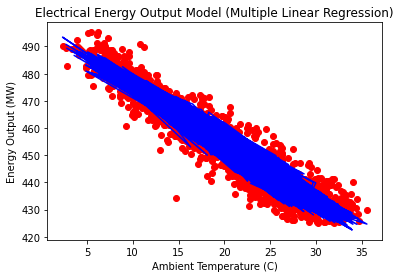

In [170]:
X0 = X_test.iloc[:,0]
plt.scatter(X0, y_test, color = 'red')
plt.plot(X0, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (Multiple Linear Regression)')
plt.xlabel('Ambient Temperature (C)')
plt.ylabel('Energy Output (MW)')
plt.show()

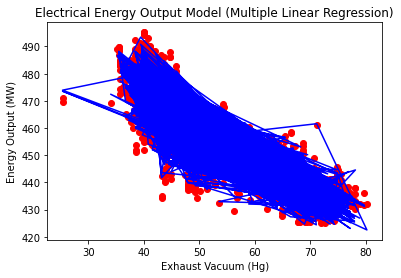

In [171]:
X1 = X_test.iloc[:,1]
plt.scatter(X1, y_test, color = 'red')
plt.plot(X1, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (Multiple Linear Regression)')
plt.xlabel('Exhaust Vacuum (Hg)')
plt.ylabel('Energy Output (MW)')
plt.show()

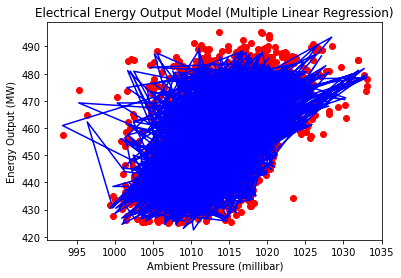

In [172]:
X2 = X_test.iloc[:,2]
plt.scatter(X2, y_test, color = 'red')
plt.plot(X2, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (Multiple Linear Regression)')
plt.xlabel('Ambient Pressure (millibar)')
plt.ylabel('Energy Output (MW)')
plt.show()

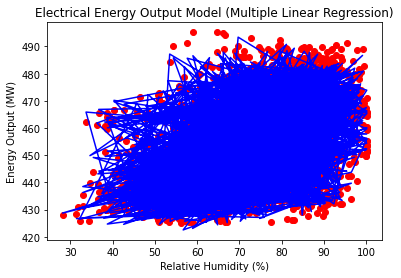

In [173]:
X3 = X_test.iloc[:,3]
plt.scatter(X3, y_test, color = 'red')
plt.plot(X3, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (Multiple Linear Regression)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Energy Output (MW)')
plt.show()

Check the accuracy of the multiple linear regression model.

In [174]:
from sklearn.metrics import r2_score

In [175]:
print(r2_score(y_test, y_pred))

0.9321860060402446


## Scaling the Features

In [176]:
# Since the input variables are all in a same range,we can skip this step
""""
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 3:6] = sc.fit_transform(X[:, 3:6])
pd.DataFrame(X)
"""""

'"\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX[:, 3:6] = sc.fit_transform(X[:, 3:6])\npd.DataFrame(X)\n'

## Measuring the Model Performance

In [177]:
from sklearn.metrics import mean_squared_error
RMSE=(mean_squared_error(y_pred,y_test))**0.5
print('RMSE: ', RMSE)

RMSE:  4.508879190536165


## Training and Testing Predictive Models

In [178]:
NewDataPt=np.array([15, 40, 1020, 70])
NewDataPt=NewDataPt.reshape(1, -1)
EP_Prediction= regressor.predict(NewDataPt)
print('The EP Prediction for the New Data Point = ', EP_Prediction)

The EP Prediction for the New Data Point =  [467.83988642]


# Method 2: Training the SVM Regression Model on the Training Set

In [179]:
# Support vector machine
from sklearn.svm import SVR
SVRmodel = SVR(kernel = 'rbf')
SVRmodel.fit(X_train, y_train)

SVR()

## Checking the SVM Model with the Test set

In [180]:
y_pred = SVRmodel.predict(X_test)
pd.DataFrame([y_pred,y_test])

,0,1,2,3,4,5,6,7,8,9,...,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913
0,455.160011,453.105815,446.119499,458.334396,458.266985,453.458997,446.056208,458.896989,456.351999,458.361275,...,446.431644,446.301358,456.922607,456.026035,454.166115,449.596572,450.515153,457.192443,443.79131,455.931133
1,458.960000,463.290000,435.270000,484.310000,473.550000,456.300000,436.020000,488.750000,469.750000,482.830000,...,438.280000,432.190000,494.870000,463.500000,449.330000,446.400000,457.120000,476.220000,440.29000,467.920000


## Visualizing the Results

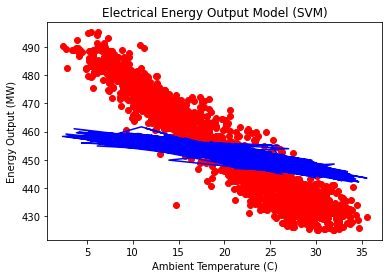

In [181]:
plt.scatter(X0, y_test, color = 'red')
plt.plot(X0, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (SVM)')
plt.xlabel('Ambient Temperature (C)')
plt.ylabel('Energy Output (MW)')
plt.show()

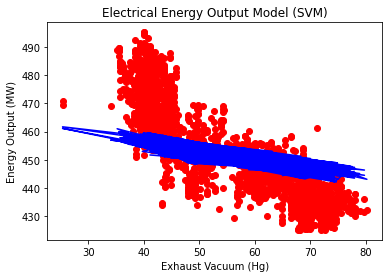

In [182]:
plt.scatter(X1, y_test, color = 'red')
plt.plot(X1, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (SVM)')
plt.xlabel('Exhaust Vacuum (Hg)')
plt.ylabel('Energy Output (MW)')
plt.show()

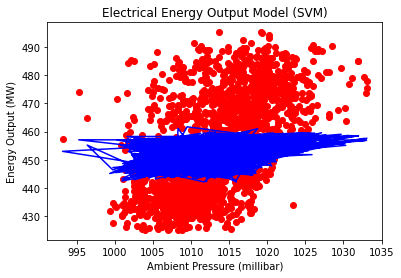

In [183]:
plt.scatter(X2, y_test, color = 'red')
plt.plot(X2, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (SVM)')
plt.xlabel('Ambient Pressure (millibar)')
plt.ylabel('Energy Output (MW)')
plt.show()

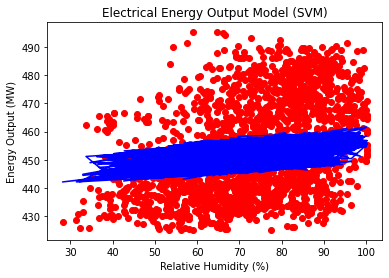

In [184]:
plt.scatter(X3, y_test, color = 'red')
plt.plot(X3, y_pred, color = 'blue')
plt.title('Electrical Energy Output Model (SVM)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Energy Output (MW)')
plt.show()

## Training and Testing Predictive Models

In [185]:
NewDataPt=np.array([15, 40, 1020, 70])
NewDataPt=NewDataPt.reshape(1, -1)
EP_Prediction= SVRmodel.predict(NewDataPt)
print('The EP Prediction for the New Data Point = ', EP_Prediction)

The EP Prediction for the New Data Point =  [456.02608795]


Check the accuracy of the SVM regression model.

In [186]:
print(r2_score(y_test, y_pred))

0.3839365722348349


# Comparison between Multiple Regression and SVM Regression

We built two separate models in this notebook, one using multiple linear regression and the other using support vector machine regression. The accuracy of the multiple linear regression model is much higher at 93.2% compared to the SVM regression model at 38.4%.